## Bibliotecas


In [1]:
%pip install pandas
%pip install plotly_express
%pip install missingno
%pip install scipy
%pip install scikit-learn
%pip install prophet 


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importações

In [2]:
from math import sqrt
import pandas as pd
import plotly_express as px
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Carregamento de dados


In [3]:
# Importa os dados da Mobly
df = pd.read_csv("../documentos/outros/base_de_dados/mobly_data.csv", sep = ",")
df

,date,weekday_name,sku,unit_price,shipment_type,anchor_category,product_department,product_category,origin_country,process_costing,...,avg_website_visits_last_week,stock_qty,log_avg_website_visits_last_week,month,day,year,log_unit_price,log_revenue,log_stock,log_items_sold
0,2020-01-01,6,549,1099.99,0,24,3,11,0,0,...,17.285714,0,2.906120,1,1,2020,7.003965,0.000000,0.000000,0.000000
1,2020-01-01,6,669,413.99,0,13,4,9,0,1,...,48.857143,56,3.909162,1,1,2020,6.028254,0.000000,4.043051,0.000000
2,2020-01-01,6,745,949.99,0,10,4,12,0,1,...,22.714286,0,3.166078,1,1,2020,6.857504,6.889612,0.000000,0.693147
3,2020-01-01,6,129,2949.99,0,24,4,11,0,1,...,2.800000,0,1.335001,1,1,2020,7.989896,0.000000,0.000000,0.000000
4,2020-01-01,6,697,657.99,0,17,4,9,0,1,...,0.000000,0,0.000000,1,1,2020,6.490708,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780105,2023-07-03,1,48,504.88,0,2,4,9,0,1,...,41.000000,61,3.737670,7,3,2023,6.226299,0.000000,4.127134,0.000000
780106,2023-07-03,1,182,1717.95,0,23,4,11,0,1,...,154.142857,1,5.044346,7,3,2023,7.449469,0.000000,0.693147,0.000000
780107,2023-07-03,1,109,1659.88,0,5,4,9,0,1,...,138.000000,16,4.934474,7,3,2023,7.415103,0.000000,2.833213,0.000000
780108,2023-07-03,1,184,909.96,0,9,4,12,0,1,...,32.714286,20,3.517922,7,3,2023,6.814499,0.000000,3.044522,0.000000


## Escolha e manipulação das features

No momento de escolha das features, o grupo optou por dividir entre features internas (que já fazem parte do dataframe) e features externas (que estão relacionadas com dados  exteriores e que serão implementados dentro do dataframe).

Em relação as features internas, decidmos manter todas as colunas apresentadas no dataframe acima, visto que no notebook anterior ("Data_Exploration") retiramos todas as features que julgamos não necessárias para o treinamento e estruturação do modelo preditivo.
Tais colunas foram retiradas porque: eram relacionadas com carcterísticas dos produtos (como tamanho e peso) e entendemos que não exibe uma influência significativa no número de vendas; apresentava apenas um atributo (coluna mobly_item); sua significância para o modelo foi refutada pelo grupo e pelo parceiro, como no caso da coluna supplier_delivery_time e as colunas relacionadas a vendas em bandos.

Em relação as features externas, o grupo otou por adicionar: taxa do dólar e empregabilidade. Tal escolha foi feita considerando o pedido do parceiro em relação a adição dessas variáveis, levando em conta que influenciam no poder de compra dos clientes e, portanto, na quantidade de itens vendidos, sendo importante incorporar com as outras variáveis existentes para um melhor desempenho do modelo.

Para tanto, foram feitas as mudanças a seguir:


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Cria uma cópia do DataFrame original para trabalhar com ele e transforma a coluna 'date' para DateTime
df_day = df
df_day['date'] = pd.to_datetime(df_day['date'], format='%Y-%m-%d')
df_day['month'] = df_day['date'].dt.month
df_day['day'] = df_day['date'].dt.day
df_day['year'] = df_day['date'].dt.year

# Cria um pivot table que calcula a média dos valores da coluna 'items_sold' com base nos valores das colunas 'month' e 'day'
df_day_heatmap = df_day.pivot_table(values='items_sold', index='month', columns='day', aggfunc='mean')

# Cria um heatmap com os valores da pivot table 'df_day_heatmap' e configura rótulos e títulos adequados
color = "deep"
heatmap_sold = px.imshow(df_day_heatmap,
                labels=dict(x="Dia", y="Mês", color="Média de itens vendidos"),
                x=df_day_heatmap.columns,
                y=df_day_heatmap.index,
                color_continuous_scale = color).update_layout(title="Mapa de Calor da Média de Itens Vendidos por Dia e Mês", xaxis_side='bottom')
heatmap_sold.show() # Exibe o heatmap

### Dados sobre a cotação do dolar(em reais) e da empregabilidade (em porcentagem)

In [6]:
# Define e exibe o dataframe sobre dólar 
dollar_df = pd.read_csv("../documentos/outros/base_de_dados/dollar.csv", sep=",")
dollar_df

,year_dollar,month_dollar,value_dollar
0,2020,1,4.0949
1,2020,2,4.1622
2,2020,3,4.3163
3,2020,4,4.7362
4,2020,5,5.2579
5,2020,6,5.8229
6,2020,7,5.1883
7,2020,8,5.3491
8,2020,9,5.3852
9,2020,10,5.2728


In [7]:
# Define e exibe o dataframe sobre empregabilidade
employability_df = pd.read_csv("../documentos/outros/base_de_dados/employability.csv", sep=",")
employability_df

,year_employability,month_employability,rate_employability
0,2020,1,12.4
1,2020,2,12.4
2,2020,3,12.4
3,2020,4,13.6
4,2020,5,13.6
5,2020,6,13.6
6,2020,7,14.9
7,2020,8,14.9
8,2020,9,14.9
9,2020,10,14.2


### Adição dos dados sobre o dólar e empregabilidade no dataframe

In [8]:
# Agrupa os DataFrames usando as colunas 'year' e 'month'
df = pd.merge(df, dollar_df, left_on=["year", "month"], right_on=["year_dollar", "month_dollar"], how="left")

# Remove as colunas de ano e mês duplicadas após a junção
df.drop(columns=["year_dollar", "month_dollar"], inplace=True)

# Agrupa os DataFrames de empregabilidade e resultado usando a coluna 'year' e 'month'
df = df.merge(employability_df, left_on=["year", "month"], right_on=["year_employability", "month_employability"], how="left")

# Remove as colunas de ano e mês duplicadas após a junção
df.drop(columns=["year_employability", "month_employability"], inplace=True)
df

,date,weekday_name,sku,unit_price,shipment_type,anchor_category,product_department,product_category,origin_country,process_costing,...,log_avg_website_visits_last_week,month,day,year,log_unit_price,log_revenue,log_stock,log_items_sold,value_dollar,rate_employability
0,2020-01-01,6,549,1099.99,0,24,3,11,0,0,...,2.906120,1,1,2020,7.003965,0.000000,0.000000,0.000000,4.0949,12.4
1,2020-01-01,6,669,413.99,0,13,4,9,0,1,...,3.909162,1,1,2020,6.028254,0.000000,4.043051,0.000000,4.0949,12.4
2,2020-01-01,6,745,949.99,0,10,4,12,0,1,...,3.166078,1,1,2020,6.857504,6.889612,0.000000,0.693147,4.0949,12.4
3,2020-01-01,6,129,2949.99,0,24,4,11,0,1,...,1.335001,1,1,2020,7.989896,0.000000,0.000000,0.000000,4.0949,12.4
4,2020-01-01,6,697,657.99,0,17,4,9,0,1,...,0.000000,1,1,2020,6.490708,0.000000,0.000000,0.000000,4.0949,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780105,2023-07-03,1,48,504.88,0,2,4,9,0,1,...,3.737670,7,3,2023,6.226299,0.000000,4.127134,0.000000,4.8222,8.0
780106,2023-07-03,1,182,1717.95,0,23,4,11,0,1,...,5.044346,7,3,2023,7.449469,0.000000,0.693147,0.000000,4.8222,8.0
780107,2023-07-03,1,109,1659.88,0,5,4,9,0,1,...,4.934474,7,3,2023,7.415103,0.000000,2.833213,0.000000,4.8222,8.0
780108,2023-07-03,1,184,909.96,0,9,4,12,0,1,...,3.517922,7,3,2023,6.814499,0.000000,3.044522,0.000000,4.8222,8.0


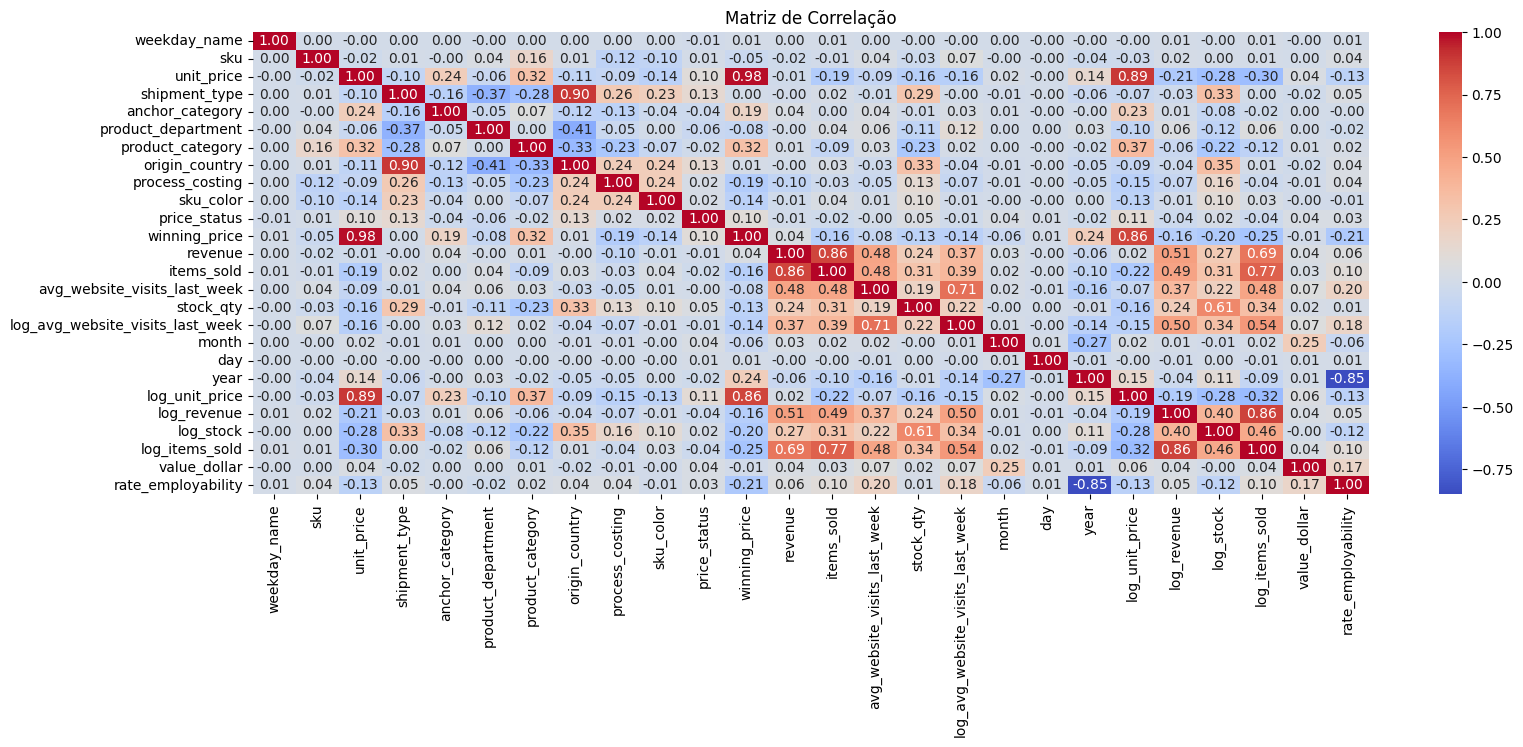

In [9]:
# Cria a matriz de correlação das colunas, com as variáveis externas
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

## Teste de diferentes modelos

Para encontrar o modelo que mais se encaixa, o grupo optou por testar três algoritmos diferentes aprendidos ao decorrer das aulas. Eles são: Random Forest, Regressão Linear e Árvore de decisão.


A descrição e aplicação de cada algoritmo será explicado abaixo

### Preparação dos dados

Utilizando o pacote sklearn foi feito o treinamento do modelo, separando 20% dos dados para teste.

In [ ]:
# Divide os dados em conjuntos de treinamento e teste
X = df.drop('items_sold', axis=1)
y = df['items_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest


Um dos modelos escolhidos para testar a predição de vendas da empresa Mobly foi o random forest. Tal modelo tem como base um algoritmo que cria um conjunto de árvores de decisões individuais e combina suas previsões para um resultado mais preciso. A escolha desse algoritmo para teste foi feito porque ele lida bem com modelos de regressão e se mostra ser bem completo, lidando com diferentes tipos de features e questões como ovefitting e outliers.


Durante a aplicação do algoritmo, foi necessário excluir algumas colunas que poderiam diminuir a performance do modelo, uma vez que o Random Forest consegue lidar melhor com dados brutos ao invés de normalizados. Sendo assim, essas colunas são:

* A coluna `date`, pois o algoritmo não aceita dados que são do tipo `date.time`. Essa exclusão não alterou de forma negativa o modelo, uma vez que tal coluna já havia sido fragmentada em três colunas: `day`, `month` e `year`;
* As colunas de log, uma vez que o modelo lida bem com dados não normalizados e essas colunas normalizadas a partir do log poderiam abrir brechas para a ocorrência do overffiting ou, até mesmo, de uma variância indesejada dos dados gerados pelo modelo. Além disso, essas colunas de log geram dados muito granulares, fazendo com que as árvores do modelo se torne muito complexa;
* A coluna `winning_price`, uma vez que apresentava dados nulos. Essa coluna foi preenchida posteriormente, haja vista que o parceiro disponibilizou uma base de dados que contém tal coluna preenchida;
* A coluna revenue, uma vez que ela sobrepõe as colunas `items_sold` e `unit_price` e, portanto, gera data leakage.


Depois de realizarmos essa limpeza de ruídos realizamos o treinamento do modelo e, depois, avaliamos as suas métricas,

In [ ]:
# Exclui as colunas citadas acima
df = df.drop(["date", "log_unit_price","log_revenue", "log_stock", "log_items_sold",
              "log_avg_website_visits_last_week","winning_price","revenue"], axis =1)
# Exibe o dataframe
df

,weekday_name,sku,unit_price,shipment_type,anchor_category,product_department,product_category,origin_country,process_costing,sku_color,price_status,items_sold,avg_website_visits_last_week,stock_qty,month,day,year,value_dollar,rate_employability
0,6,549,1099.99,0,24,3,11,0,0,12,3,0,17.285714,0,1,1,2020,4.0949,12.4
1,6,669,413.99,0,13,4,9,0,1,9,3,0,48.857143,56,1,1,2020,4.0949,12.4
2,6,745,949.99,0,10,4,12,0,1,17,3,1,22.714286,0,1,1,2020,4.0949,12.4
3,6,129,2949.99,0,24,4,11,0,1,21,3,0,2.800000,0,1,1,2020,4.0949,12.4
4,6,697,657.99,0,17,4,9,0,1,31,2,0,0.000000,0,1,1,2020,4.0949,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780105,1,48,504.88,0,2,4,9,0,1,6,2,0,41.000000,61,7,3,2023,4.8222,8.0
780106,1,182,1717.95,0,23,4,11,0,1,12,4,0,154.142857,1,7,3,2023,4.8222,8.0
780107,1,109,1659.88,0,5,4,9,0,1,22,2,0,138.000000,16,7,3,2023,4.8222,8.0
780108,1,184,909.96,0,9,4,12,0,1,5,2,0,32.714286,20,7,3,2023,4.8222,8.0


##### Preparação de dados

Utilizando o pacote sklearn foi feito a preparação do modelo, separando 20% dos dados para teste.

A preparação a seguir será utilizada para os próximos modelos também.

In [ ]:
# Divide os dados em conjuntos de treinamento e teste
X = df.drop('items_sold', axis=1)
y = df['items_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Treinamento

In [ ]:
# Evoca o algoritmo Random Forest de regressão
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Treina o modelo
random_forest.fit(X_train, y_train)

KeyboardInterrupt: 

##### Teste

In [ ]:
# Realiza as previsões no conjunto de teste
y_pred = random_forest.predict(X_test)

# Calcula as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprime as métricas
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 8.976582963363061
Mean Absolute Error (MAE): 1.4803253981846207
Root Mean Squared Error (RMSE): 2.996094618559811
R-squared (R²): 0.722029330887925


Aqui foi feito um agrupamento semanal dos dias e devolve a previsão da quantidade de venda de cada sku na semana desejada, além de uma soma total de todas as vendas da semana.

In [ ]:
# Cria uma coluna que representa a data completa das vendas de cada SKU
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Crie uma coluna que representa a semana para cada data
df['week'] = df['date'].dt.strftime('%U')

# Define uma função que prevê as vendas para uma data específica
def forecast__sales_to_date(df, day, month, year):
    date_input = pd.to_datetime(f"{year}-{month}-{day}")
    week_input = date_input.strftime('%U')
    
    # Filtra o DataFrame para a semana correspondente à data de entrada
    week_data = df[df['week'] == week_input]
    
    # Calcula a previsão das vendas para a semana separada por SKU
    sales_forecast = week_data.groupby('sku')['items_sold'].mean().reset_index()
    
    # Calcula a soma de todos os itens vendidos na semana
    week_sum = week_data['items_sold'].sum()
    
    return sales_forecast, week_sum

# Exemplifica o uso da função para prever vendas para uma data específica (por exemplo, 10 de setembro de 2023)
day_input = 25
month_input = 11
year_input = 2023
forecast, week_sum = forecast__sales_to_date(df, day_input, month_input, year_input)

# Exibe os resultados 
print("Previsão de vendas por SKU:")
print(forecast)
print(f"Soma de todos os itens vendidos na semana que inclui {day_input}/{month_input}/{year_input}: {week_sum}")

Previsão de vendas por SKU:
Empty DataFrame
Columns: [sku, items_sold]
Index: []
Soma de todos os itens vendidos na semana que inclui 25/11/2023: 0


### Regressão Linear

Outro modelo que o grupo optou por testar foi o de Regressão Linear. Esse algoritmo é também uma técnica estatística fundamental no campo da análise de dados e aprendizado de máquina. Ela é usada para modelar a relação entre uma variável dependente (rótulo) e uma ou mais variáveis independentes (características) por meio de uma equação linear. O objetivo da regressão linear é encontrar a linha reta que melhor se ajusta aos dados, permitindo fazer previsões ou inferências sobre os valores da variável dependente com base nas variáveis independentes. É uma abordagem simples e interpretável para a modelagem de relacionamentos lineares entre variáveis e é amplamente aplicada em diversos domínios, incluindo economia, ciências sociais, ciência dos dados e engenharia.

Entretanto, a regressão linear possui limitações importantes. A principal delas é a suposição de uma relação estritamente linear entre as variáveis. Isso implica que o modelo presume que as mudanças nas variáveis independentes têm um efeito linear nas mudanças na variável dependente. Quando essa suposição não se aplica, a regressão linear torna-se inadequada. Se, por exemplo, a relação entre as variáveis for curvilínea ou não linear, a regressão linear não será capaz de captar essa complexidade. Além disso, essa abordagem não lida bem com relações não lineares entre variáveis.


In [10]:
# Cópia do dataframe original
df_rl = df.copy()

# Exclui a coluna de date criada anteriormente, uma vez que o modelo não permite a coluna de data
df_rl = df_rl.drop(["date", "log_unit_price", "log_avg_website_visits_last_week", "log_revenue", "log_stock", "log_items_sold", "winning_price", 
              "sku", "sku_color", "process_costing", "origin_country", "product_category", "product_department", 
              "anchor_category", "shipment_type", "weekday_name", "price_status", "month", "revenue"], axis =1)

# Divide os dados em conjuntos de treinamento e teste
X = df_rl.drop('items_sold', axis=1)
y = df_rl['items_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Verificando o novo dataframe
df

,date,weekday_name,sku,unit_price,shipment_type,anchor_category,product_department,product_category,origin_country,process_costing,...,log_avg_website_visits_last_week,month,day,year,log_unit_price,log_revenue,log_stock,log_items_sold,value_dollar,rate_employability
0,2020-01-01,6,549,1099.99,0,24,3,11,0,0,...,2.906120,1,1,2020,7.003965,0.000000,0.000000,0.000000,4.0949,12.4
1,2020-01-01,6,669,413.99,0,13,4,9,0,1,...,3.909162,1,1,2020,6.028254,0.000000,4.043051,0.000000,4.0949,12.4
2,2020-01-01,6,745,949.99,0,10,4,12,0,1,...,3.166078,1,1,2020,6.857504,6.889612,0.000000,0.693147,4.0949,12.4
3,2020-01-01,6,129,2949.99,0,24,4,11,0,1,...,1.335001,1,1,2020,7.989896,0.000000,0.000000,0.000000,4.0949,12.4
4,2020-01-01,6,697,657.99,0,17,4,9,0,1,...,0.000000,1,1,2020,6.490708,0.000000,0.000000,0.000000,4.0949,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780105,2023-07-03,1,48,504.88,0,2,4,9,0,1,...,3.737670,7,3,2023,6.226299,0.000000,4.127134,0.000000,4.8222,8.0
780106,2023-07-03,1,182,1717.95,0,23,4,11,0,1,...,5.044346,7,3,2023,7.449469,0.000000,0.693147,0.000000,4.8222,8.0
780107,2023-07-03,1,109,1659.88,0,5,4,9,0,1,...,4.934474,7,3,2023,7.415103,0.000000,2.833213,0.000000,4.8222,8.0
780108,2023-07-03,1,184,909.96,0,9,4,12,0,1,...,3.517922,7,3,2023,6.814499,0.000000,3.044522,0.000000,4.8222,8.0


#### Normalização 

In [12]:
# Normalização dos dados 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Treinamento

In [13]:
# Evoca o algoritmo de Regressão Linear
model = LinearRegression()

# Treina o modelo
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Teste

In [14]:
# Realiza as previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

# Calcula as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)


mse_train = mean_squared_error(y_train, y_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Imprime as métricas
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print(" ")
print("Mean Squared Error (MSE) - TREINO:", mse_train)
print("Mean Absolute Error (MAE) - TREINO:", mae_train)
print("Root Mean Squared Error (RMSE) - TREINO:", rmse_train)
print("R-squared (R²) - TREINO:", r2_train)

Mean Squared Error (MSE): 25.558232655093505
Mean Absolute Error (MAE): 2.363514011260786
Root Mean Squared Error (RMSE): 5.055515073174394
R-squared (R²): 0.2988059265863108
 
Mean Squared Error (MSE) - TREINO: 0.0
Mean Absolute Error (MAE) - TREINO: 2.373108070404432
Root Mean Squared Error (RMSE) - TREINO: 0.0
R-squared (R²) - TREINO: 0.2938405522470582


### Árvore de Decisão

A Árvore de Decisão funciona construindo uma estrutura de árvore na qual cada nó representa uma decisão baseada em uma característica (ou atributo) específica dos dados. A ideia principal por trás de uma árvore de decisão é dividir iterativamente o conjunto de dados em subconjuntos menores e mais homogêneos com base nas características, até que uma decisão final seja tomada. A segmentação que a Árvore faz, permite a captura de padrões e interações entre os preditores. Essa abordagem também lida bem com dados heterogêneos e pode acomodar variáveis categóricas. Apesar da sua aplicabilidade, a Árvore de decisão tem algumas limitações importantes a considerar. Uma das principais desvantagens é sua tendência ao overfitting, onde a árvore pode se adaptar muito aos dados de treinamento, prejudicando sua capacidade de generalização para novos dados. Além disso, essas árvores podem ser instáveis, resultando em diferentes estruturas com pequenas variações nos dados, o que pode ser problemático para a estabilidade do modelo, as árvores de decisão não extrapolam bem para fazer previsões fora do intervalo dos dados observados e podem ser sensíveis a desequilíbrios nos dados. Apesar das limitações, a Árvore de Decisão ainda é uma escolha versátil para a modelagem de regressão.

#### Treinamento

In [15]:
# Evoca o algoritmo de Árvore de Decisão
tree_regressor = DecisionTreeRegressor(max_depth=3)
# Treina o modelo
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

#### Testes

In [16]:
# Realiza as previsões no conjunto de teste
y_pred = tree_regressor.predict(X_test)

# Calcula as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprime as métricas
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 26.63081900872144
Mean Absolute Error (MAE): 2.3976261886782666
Root Mean Squared Error (RMSE): 5.160505693119759
R-squared (R²): 0.269379353765814


### Prophet

A fim de explorar outros modelos de predição foi escolhido o Prophet, uma vez que é uma biblioteca de previsão de séries temporais desenvolvida pelo Facebook. Neste contexto, uma série temporal refere-se a um conjunto de dados que varia com o tempo, como as vendas de produtos ao longo de meses ou anos. É importante ressaltar que a escolhemos apenas como uma opção adicional ao nosso modelo para prever as vendas, já que não se mostrou tão precisa. Embora seja uma ferramenta poderosa e de fácil uso, é importante notar que o Prophet se mostrou limitado ao lidar com muitas variáveis ou dados complexos, já que ele considera apenas duas colunas: de data e itens vendidos. 

In [17]:
# Cria uma coluna 'ds' que representa a data da venda de cada SKU
df['ds'] = pd.to_datetime(df[['year', 'month', 'day']])

In [18]:
# Renomeia a coluna 'items_sold' para 'y' (convenção do Prophet)
df.rename(columns={'items_sold': 'y'}, inplace=True)

In [19]:
# Cria um modelo Prophet
model = Prophet()

In [20]:
# Ajusta o modelo aos seus dados
model.fit(df)

In [ ]:
# Cria um DataFrame com as datas futuras para previsão
future = model.make_future_dataframe(periods=365)  # 365 dias no futuro

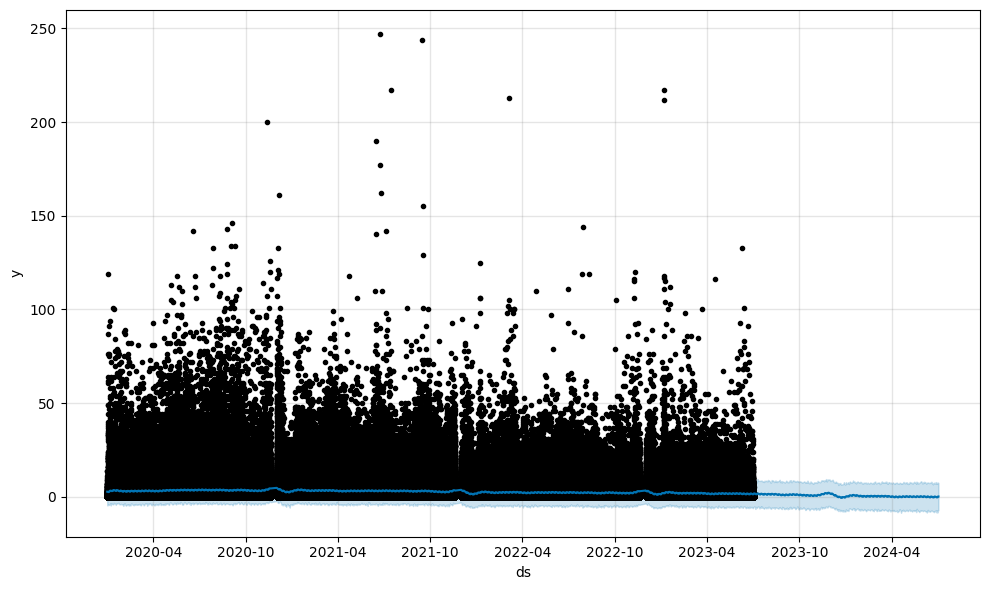

In [ ]:
# Realiza as previsões
forecast = model.predict(future)

# Exibe as previsões geradas
fig = model.plot(forecast)

## Métricas de Avaliação

As métricas desempenham um papel essencial na avaliação de modelos de regressão supervisionados, fornecendo uma avaliação quantitativa do desempenho e da qualidade das previsões. Em um modelo de regressão, o objetivo principal é criar uma relação entre variáveis de entrada e variáveis de saída, permitindo que o modelo faça previsões precisas com base nos dados de treinamento. Sabendo disso, pensamos em 4 métricas para o nosso modelo, sendo elas:

1. **MAE (Erro Absoluto Médio):** O Erro Absoluto Médio (MAE) foi selecionado como uma métrica de avaliação para nosso modelo de regressão supervisionado devido às suas características valiosas. De acordo com o artigo de Padhma, o MAE mede a média das diferenças absolutas entre as previsões do modelo e os valores reais, independentemente de serem erros positivos ou negativos, algo evidenciado na figura 38. Esta escolha é relevante para nosso contexto, onde estamos interessados em avaliar a precisão média das previsões sem favorecer erros positivos ou negativos. Ao utilizar o MAE como métrica de avaliação, garantimos que nosso modelo seja sensível a todos os tipos de erros, o que é importante para entender como nossas previsões se desviam dos valores reais em termos de magnitude média.

2. **MSE (Erro Quadrático Médio):** O Erro Quadrático Médio (MSE) foi escolhido como uma métrica adicional para a avaliação do nosso modelo de regressão supervisionado. Optamos por incluir o MSE devido à sua capacidade de penalizar erros maiores de forma mais significativa, o que é relevante para nossa necessidade de identificar previsões que tenham erros consideráveis. A inclusão do MSE como métrica complementar ao MAE permite que tenhamos uma visão mais abrangente do desempenho do modelo. E segundo Padhma, o MSE leva em consideração a magnitude dos erros e, ao elevar os erros ao quadrado, conforme evidencia a figura 39, proporciona maior peso a erros maiores, fornecendo uma perspectiva mais sensível a previsões imprecisas.

3. **RMSE (Raiz quadrada do erro-médio):** O RMSE foi escolhido com métrica para o nosso modelo, ele desempenha um papel fundamental ao quantificar a diferença entre os valores previstos pelo modelo e os valores reais observados. Padhma diz que o cálculo do RMSE envolve a determinação da raiz quadrada da média dos erros ao quadrado, algo mostrado na figura 40, o que resulta em uma medida que expressa a dispersão dos erros de previsão. A utilidade do RMSE se mostra na capacidade de refletir a magnitude dos erros cometidos pelo modelo em relação aos dados reais. Um RMSE baixo indica que o modelo está produzindo previsões próximas aos valores reais, enquanto um RMSE elevado sugere que há espaço para melhorias no ajuste do modelo.

3. **R² Score (Coeficiente de Determinação):** O Coeficiente de Determinação foi escolhido como a métrica principal para a avaliação do nosso modelo e, de acordo com o artigo de Benjamin, O R² varia de 0 a 1, onde valores próximos de 1 indicam que o modelo é capaz de explicar uma grande parte da variação nos dados, enquanto valores próximos de 0 indicam que o modelo não está explicando bem a variabilidade. A importância do R² se dá na sua capacidade de fornecer uma visão panorâmica da qualidade global do ajuste do modelo. Ele não se concentra na magnitude dos erros individuais, mas sim na capacidade do modelo de explicar as variações totais nos dados. A figura 41 evidencia a fórmula utilizada para calcular o R² Score.

Em resumo, a escolha cuidadosa das métricas é fundamental para a avaliação do modelo. O uso dessas métricas permite quantificar o desempenho do modelo, destacando sua capacidade de fazer previsões precisas e capturar relacionamentos entre variáveis. Ao adotar métricas adequadas e interpretar seus resultados de maneira significativa, o grupo consegue ajustar parâmetros do modelo e garantir que ele atenda aos requisitos específicos do projeto. Dessa forma, as métricas se tornam ferramentas valiosas para orientar o desenvolvimento e a otimização do modelo.

## Análise do Modelo Candidato

### Apresentação do Modelo Candidato

Após realizarmos a modelagem do problema no tópico **Testes de diferentes modelos**, escolhemos utilizar para o desenvolvimento do modelo preditivo para a Mobly o algoritmo **Random Forest**.
O Random Forest é um algoritmo que seleciona subconjuntos de features e, a partir deles, é possível formar diversas mini árvores de decisão. Sendo assim, o algoritmo, por meio de suas diversas árvores de decisão, consegue produzir previsões mais robustas e precisas.
Em relação ao contexto do projeto, que é prever a quantidade de itens de um determinado SKU em um certo período, o Random Forest demonstrou ser um algoritmo compatível com o objetivo do projeto, haja vista que:
* A base de dados fornecida pela Mobly possui várias features com diferentes características, algo que o Random Forest tem facilidade de lidar para realizar a previsão;
* O Random Forest ajuda a reduzir o risco de overfitting devido à presença da combinação de diferentes árvores de decisão, algo importante para que o modelo consiga se ajustar, de forma equilibrada, tanto aos dados de teste quanto aos dados de treino, gerando, então, uma generalização dos dados balanceada e previsões confiáveis;
* O Random Forest consegue lidar, de forma robusta, com a presença de outliers nos dados que estão sendo utilizados para formular o modelo, algo que ajuda a diminuir os impactos nas previsões.
Portanto, após todas essas análises mais profundas sobre o Random Forest, é visível que tal algoritmo se destaca para solucionar o problema do projeto em questão e, por isso, escolhemos tal algoritmo para que ele seja o nosso modelo candidato. Ademais, no tópico a seguir será destacado os seus resultados em comparação com os outros modelos que testamos no tópico **Testes de diferentes modelos**. 

### Discussão sobre os resultados do modelo candidato

Como destacado no tópico anterior, escolhemos o Random Forest como o nosso modelo candidato para prever a quantidade de itens vendidos durante um período e, por isso, buscamos analisar de forma mais detalhada as métricas de avaliação dos seus resultados, algo que é de suma importância para o objetivo do projeto desenvolvido para a Mobly. 

Em princípio, as métricas utilizadas para avaliar tal desempenho do modelo foram aquelas destacadas no tópico **Métricas**, que são: MAE (Erro Absoluto Médio), MSE (Erro Quadrático Médio), RMSE (Raiz Quadrada do Erro Médio) e R^2 Score (Coeficiente de Determinação). É válido destacar que, diante dessas quatro métricas, a que mais prezamos para avaliar o desempenho do Random Forest treinado foi a _R² Score_, dado que ela é fácil de interpretar e de entender, além de que consegue expressar uma medida da qualidade geral do modelo, haja vista que tal métrica explica a variabilidade presente nos dados de saída gerados pelo modelo. 

Sendo assim, mesmo prezando pela _R² Score_, realizamos a análise de todas as métricas citadas, pois são fundamentais para fornecer uma avaliação quantitativa da qualidade das previsões geradas pelo modelo, decidimos treinar o modelo Random Forest e analisar tais métricas aplicadas ao modelo e, assim, obtemos os seguintes resultados:
* **MAE:** 1.537142967017472
* **MSE:** 11.464828062709106
* **RMSE:** 3.385975201136167
* **R² Score:** 0.6854606655019839

Tendo esses números de cada métrica de avaliação em vista, é importante destacar qual a importância de tais resultados. Em relação ao MAE, como ele representa a média das diferenças absolutas entre as previsões, o valor do MAE de aproximadamente 1,54 sugere que, em média, o modelo desenvolvido consegue prever a quantidade de itens vendidos por SKU com um erro absoluto de cerca de 1,54 unidades. Isso sugere que as previsões geradas pelo modelo estão, de certa forma, precisas, haja vista que, quanto mais próximo de zero o valor do MAE estiver, mais preciso é o modelo.

Sobre o MSE, como ele calcula a média dos quadrados das diferenças entre as previsões geradas pelo modelo e os valores reais, o valor do MSE de aproximadamente 11,46 indica que o modelo tem um erro médio quadrático de cerca de 11,46 unidades. Isso sugere que o modelo contém erros médios significativos, podendo ser um ponto de alerta para que o modelo preditivo desenvolvido seja mais preciso do que isso. Sendo assim, o próximo passo será ajustar tal modelo candidato para que essa métrica de avaliação possa ser otimizada.

No que diz respeito ao RMSE, o qual calcula a raiz quadrada do MSE, o seu valor de aproximadamente 3,39 unidades de quantidade de itens vendidos indica que o modelo erra em cerca de 3,39 unidades em suas previsões. Isso indica que o modelo está gerando previsões que ainda não alcançaram o estágio de precisão desejado, o que evidencia que o modelo está no caminho certo, porém precisa passar por alguns processos de melhorias e otimização.

No que tange o _R² Score_, como ele consegue fornecer a proporção da variação dos dados, o valor de _R² Score_ de cerca de 0,69 significa que o modelo desenvolvido é capaz de explicar 69% das variações presentes nos dados de vendas. Com isso, é possível observar que o modelo apresenta um desempenho razoavelmente bom, haja vista que, quanto mais próximo o valor de _R² Score_ estiver de 1, mais o modelo consegue explicar as variações presentes nos dados e, seguindo essa linha, o modelo treinado e desenvolvido até então está conseguindo explicar mais da metade da variabilidade presente nos dados, indicando que tal modelo candidato está conseguindo capturar determinados padrões de dados de forma coerente. 

Por fim, é válido ressaltar a diferença entre a métrica de avaliação _R² Score_ do modelo candidato e essa mesma métrica dos outros modelos de teste. Nesse sentido, o _R² Score_ do modelo de Regressão Linear apresentou o valor de, aproximadamente, 0,30, o que significa que o modelo só consegue explicar 30% das variações presentes nos dados gerados pelo modelo. Esse valor em comparação com o _R² Score_ do modelo de Random Forest (0,69 ou 69% aproximadamente) demonstra que esse modelo é bem mais preciso que o modelo de Regressão Linear. O modelo de Árvore de Decisão apresentou o valor de _R² Score_ de aproximadamente 0,27, indicando que tal modelo só consegue explicar 27% das variabilidades dos dados de saída. Esse valor em comparação com o _R² Score_ do modelo de Random Forest (0,69 ou 69% aproximadamente) demonstra que esse modelo é bem mais preciso que o modelo de Árvore de decisão.	 


In [ ]:
# Baixa o dataframe na pasta do notebook atual
df.to_csv('mobly_data.csv', index=False)